In [12]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

we should sklearn.datasets.load_boston(*, return_X_y=True) for see our data.


In [13]:
X, y = load_boston(return_X_y=True)

In [14]:
features = pd.DataFrame(load_boston().data)
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
label = pd.DataFrame(load_boston().target) #to display target
label.head(10)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [16]:
load_boston().feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
features.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                    'TAX', 'PTRATIO', 'B', 'LSTAT']

In [18]:
features.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [19]:
label.columns = ['PRICE']

In [20]:
df = pd.concat([features, label], axis=1) #we integrate target column into data

df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


now we should check any missing value

In [21]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(df["mean area"])

C:\Users\Mervep\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

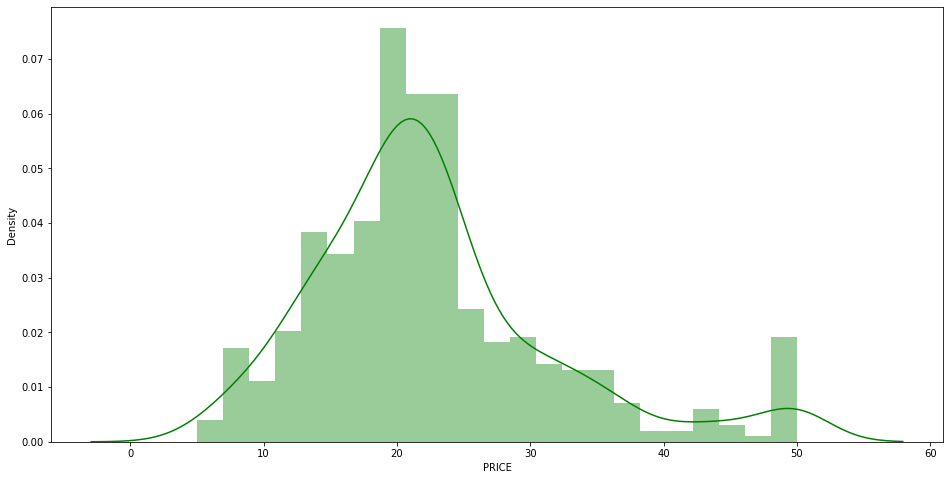

In [22]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(df["PRICE"],kde=True,color="g") #plotting distributed graph

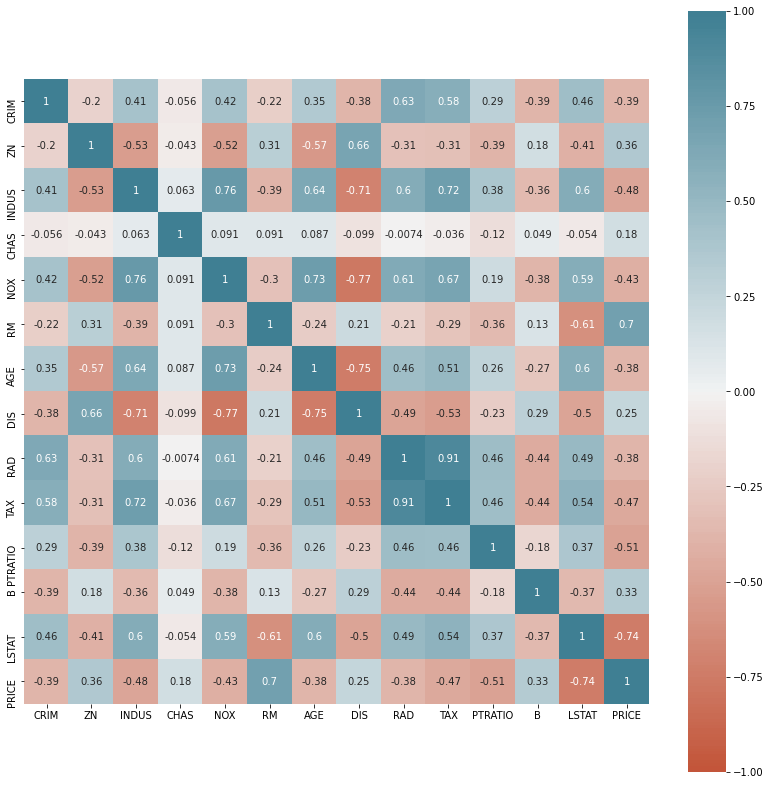

In [23]:
corr=df.corr()
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)

In statistics, a perfect negative correlation is represented by the value -1, a 0 indicates no correlation, and a +1 indicates a perfect positive correlation. 
- So, we can say CHAS variable is no correlation other variable, then we should not drop it. 
- If we look at price, the strong correlation in the same direction with RM, the strong correlation in the opposite direction with LSTAT

sns.pairplot(df,x=df.RM, y=df.PRICE,kind="reg")

In [24]:
X=df.drop("PRICE",axis=1)
y=df["PRICE"]

In [25]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now, we can split train and test set, then create a model

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [29]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [30]:
len(np.where(z > 3)[0])

100

In [54]:
outliers = list(set(np.where(z > 3)[0]))
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)
y_new = y[list(new_df["index"])]
len(y_new)

X_new = new_df.drop('index', axis = 1)

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
411,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
412,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
413,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [82]:
#feature scaling for standardization 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.50009668,  0.42727822, -1.25466328, ...,  0.43991388,
        -1.1282211 ,  0.20402825],
       [-0.49580542, -0.48858069, -0.55367539, ...,  0.43991388,
        -0.48493501, -0.09345694],
       [-0.49580951, -0.48858069, -0.55367539, ...,  0.36091635,
        -1.27512537,  1.5303164 ],
       ...,
       [-0.4889668 , -0.48858069,  0.16203913, ...,  0.43991388,
        -1.02616129,  0.19163303],
       [-0.47898384, -0.48858069,  0.16203913, ...,  0.37295037,
        -0.89626698, -0.04387608],
       [-0.49169611, -0.48858069,  0.16203913, ...,  0.43991388,
        -0.67977647, -1.29579293]])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

In [86]:
ridge_model = Ridge(alpha = 0.001)
ridge_model.fit(X_train, y_train)
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
#MODEL1

Ridge Train:  0.9999999999552047
Ridge Test:  0.9999999999391819


In [87]:
ridge_model = Ridge(alpha = 0.5)
ridge_model.fit(X_train, y_train)
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
#MODEL2

Ridge Train:  0.9999890311011146
Ridge Test:  0.9999851030742841


In [88]:
ridge_model = Ridge(alpha = 0.9)
ridge_model.fit(X_train, y_train)
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
#MODEL3

Ridge Train:  0.9999650389123701
Ridge Test:  0.9999525092345194


In [89]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
#MODEL4

Ridge Train:  0.9999999955221628
Ridge Test:  0.9999999939204485


In [90]:
ridge_model = Ridge(alpha = 50)
ridge_model.fit(X_train, y_train)
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
#MODEL 5

Ridge Train:  0.9695881541834617
Ridge Test:  0.9601329017349907


In [91]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
#MODEL 6

Lasso Train:  0.9999999861004526
Lasso Test:  0.9999999860129976


In [92]:
lasso_model = Lasso(alpha = 0.50)
lasso_model.fit(X_train, y_train)
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
#MODEL 7

Lasso Train:  0.9965251131453773
Lasso Test:  0.9965032493865588


In [93]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
#MODEL 8

Lasso Train:  0.9999986100452581
Lasso Test:  0.9999986012997546


In [94]:
lasso_model = Lasso(alpha = 0.9)
lasso_model.fit(X_train, y_train)
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
#MODEL 9

Lasso Train:  0.9887413665910225
Lasso Test:  0.9886705280124503


In [95]:
lasso_model = Lasso(alpha =5)
lasso_model.fit(X_train, y_train)
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))
#MODEL 10

Lasso Train:  0.6525113145377328
Lasso Test:  0.6503249386558727


BEST MODEL IS = MODEL 1